## What is the most optimal skill to learn for Data Analysts?

Methodology
1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
#importing libraries 

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\admin\anaconda1\envs\Project_Data\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#filter specific country and job title
country = 'France'
title = 'Data Analyst'
df_country_job = df[(df['job_country']== country) & (df['job_title_short'] == title)].copy()

In [4]:
df_country_job = df_country_job.dropna(subset='salary_year_avg')

df_country_job_explode = df_country_job.explode('job_skills')



In [11]:
df_skills = df_country_job_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_skills = df_skills.rename(columns={'count':'skill_count','median':'median_salary'})



In [19]:
job_count = len(df_country_job)

df_skills['skill_percent'] = df_skills['skill_count']/job_count * 100

skill_percent = 6

df_skills_high_demand = df_skills[df_skills['skill_percent'] > skill_percent]

df_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,28,89100.0,56.0
python,20,94800.0,40.0
tableau,18,57100.0,36.0
azure,9,80850.0,18.0
power bi,8,92925.0,16.0
excel,8,96012.5,16.0
airflow,5,57500.0,10.0
aws,5,89100.0,10.0
snowflake,5,89100.0,10.0


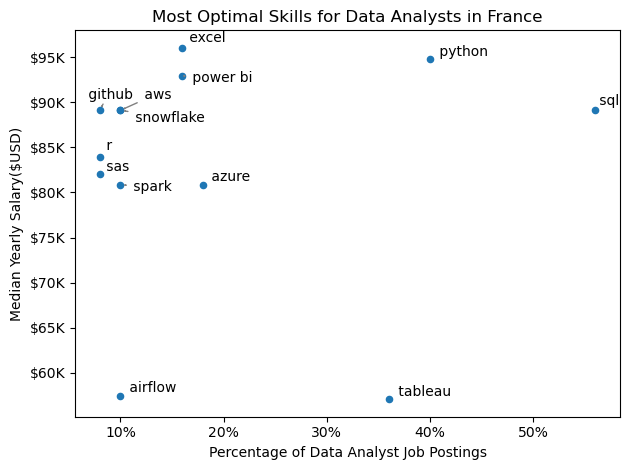

In [29]:
from adjustText import adjust_text

df_skills_high_demand.plot(kind='scatter', x='skill_percent',y= 'median_salary')


# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_skills_high_demand.index):
    texts.append(plt.text(df_skills_high_demand['skill_percent'].iloc[i], df_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# formatting

plt.xlabel(f'Percentage of {title} Job Postings')
plt.ylabel('Median Yearly Salary($USD)')
plt.title(f'Most Optimal Skills for {title}s in {country}')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

## Coloring by Technology
We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [40]:
df_tech = df['job_type_skills'].copy()

df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()


# combine all dictionaries into one
technology_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['tableau',
  'powerbi',
  'excel',
  'ssis',
  'power bi',
  'datarobot',
  'esquisse',
  'powerpoint',
  'ms access',
  'sas',
  'microstrategy',
  'sharepoint',
  'dax',
  'cognos',
  'spss',
  'spreadsheet',
  'qlik',
  'sap',
  'alteryx',
  'outlook',
  'word',
  'splunk',
  'nuix',
  'looker',
  'sheets',
  'visio',
  'ssrs',
  'msaccess'],
 'programming': ['lisp',
  'crystal',
  'css',
  'c++',
  'rust',
  'f#',
  'scala',
  'kotlin',
  'go',
  'assembly',
  'ocaml',
  'sas',
  'javascript',
  'elixir',
  'matlab',
  'powershell',
  'dart',
  'objective-c',
  'nosql',
  'sass',
  'java',
  'erlang',
  'perl',
  'ruby',
  'vba',
  'groovy',
  'r',
  'html',
  'cobol',
  'c#',
  'php',
  'sql',
  'typescript',
  'mongo',
  'shell',
  'julia',
  'no-sql',
  'apl',
  'python',
  'bash',
  'lua',
  'vb.net',
  'mongodb',
  't-sql',
  'fortran',
  'solidity',
  'golang',
  'visual basic',
  'clojure',
  'delphi',
  'pascal',
  'swift',
  'c',
  'visualbasic',
  'hask

In [41]:
# turn dictionary into dataframe
df_tech = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech

,technology,skills
0,analyst_tools,tableau
0,analyst_tools,powerbi
0,analyst_tools,excel
0,analyst_tools,ssis
0,analyst_tools,power bi
...,...,...
9,sync,rocketchat
9,sync,ringcentral
9,sync,unify
9,sync,google chat


In [61]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_skills.merge(df_tech, left_on='job_skills', right_on='skills')

df_DA_skills_tech.drop_duplicates('skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,28,89100.0,56.0,programming,sql
1,20,94800.0,40.0,programming,python
2,18,57100.0,36.0,analyst_tools,tableau
3,9,80850.0,18.0,cloud,azure
4,8,92925.0,16.0,analyst_tools,power bi
5,8,96012.5,16.0,analyst_tools,excel
6,5,57500.0,10.0,libraries,airflow
7,5,89100.0,10.0,cloud,aws
8,5,89100.0,10.0,cloud,snowflake
9,5,80850.0,10.0,libraries,spark


In [77]:
df_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

df_skills_tech_high_demand = df_skills_tech_high_demand.drop(index = df_skills_tech_high_demand.iloc[11].name)

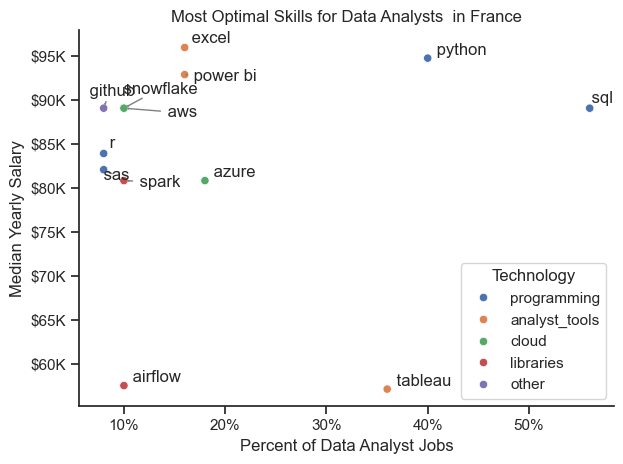

In [80]:
sns.scatterplot(data=df_skills_tech_high_demand, x='skill_percent',y='median_salary',hue='technology')
sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_skills_tech_high_demand['skills']):
    texts.append(plt.text(df_skills_tech_high_demand['skill_percent'].iloc[i], df_skills_tech_high_demand['median_salary'].iloc[i],' ' + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


# Set axis labels, title, and legend
plt.xlabel(f'Percent of {title} Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for {title}s  in {country}')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()